In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier                             
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.multiclass import OneVsRestClassifier

from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, roc_auc_score, auc
import pickle
import os

In [ ]:
os.chdir('C:/Users/Revati/Desktop')

In [ ]:
df = pd.read_csv('HRDataset.csv')

In [ ]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [ ]:
df[' BusinessTravelFrequency'] = df['BusinessTravelFrequency'].replace(['Travel_Frequently', 'Travel_Rarely', 'Non-Travel'], [2, 1, 0],inplace=True)

In [ ]:
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
del df['EmpNumber']
del df['MaritalStatus']
del df['Gender']
del df['Attrition']
del df['DistanceFromHome']

In [ ]:

df

,Age,EducationBackground,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating,BusinessTravelFrequency
0,32,Marketing,Sales,Sales Executive,1,3,4,55,3,2,...,4,10,2,2,10,7,0,8,3,None
1,47,Marketing,Sales,Sales Executive,1,4,4,42,3,2,...,4,20,2,3,7,7,1,7,3,None
2,40,Life Sciences,Sales,Sales Executive,2,4,4,48,2,3,...,3,20,2,3,18,13,1,12,4,None
3,41,Human Resources,Human Resources,Manager,1,4,2,73,2,5,...,2,23,2,2,21,6,12,6,3,None
4,60,Marketing,Sales,Sales Executive,1,4,1,84,3,2,...,4,10,1,3,2,2,2,2,3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,Medical,Sales,Sales Executive,2,1,4,71,4,2,...,2,6,3,3,6,5,0,4,4,None
1196,37,Life Sciences,Development,Senior Developer,1,2,4,80,4,1,...,1,4,2,3,1,0,0,0,3,None
1197,50,Medical,Development,Senior Developer,1,1,4,74,4,1,...,3,20,3,3,20,8,3,8,3,None
1198,34,Medical,Data Science,Data Scientist,1,3,4,46,2,3,...,2,9,3,4,8,7,7,7,3,None


In [ ]:
#Check missing valuea and duplicate entries
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   EducationBackground           1200 non-null   object
 2   EmpDepartment                 1200 non-null   object
 3   EmpJobRole                    1200 non-null   object
 4   BusinessTravelFrequency       1200 non-null   int64 
 5   EmpEducationLevel             1200 non-null   int64 
 6   EmpEnvironmentSatisfaction    1200 non-null   int64 
 7   EmpHourlyRate                 1200 non-null   int64 
 8   EmpJobInvolvement             1200 non-null   int64 
 9   EmpJobLevel                   1200 non-null   int64 
 10  EmpJobSatisfaction            1200 non-null   int64 
 11  NumCompaniesWorked            1200 non-null   int64 
 12  OverTime                      1200 non-null   int64 
 13  EmpLastSalaryHikeP

In [ ]:
df = df.iloc[: , :-1]
df.head()

,Age,EducationBackground,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,Marketing,Sales,Sales Executive,1,3,4,55,3,2,...,12,4,10,2,2,10,7,0,8,3
1,47,Marketing,Sales,Sales Executive,1,4,4,42,3,2,...,12,4,20,2,3,7,7,1,7,3
2,40,Life Sciences,Sales,Sales Executive,2,4,4,48,2,3,...,21,3,20,2,3,18,13,1,12,4
3,41,Human Resources,Human Resources,Manager,1,4,2,73,2,5,...,15,2,23,2,2,21,6,12,6,3
4,60,Marketing,Sales,Sales Executive,1,4,1,84,3,2,...,14,4,10,1,3,2,2,2,2,3


In [ ]:
df['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: 1 if x >=3 else 0)
df.head()

,Age,EducationBackground,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,Marketing,Sales,Sales Executive,1,3,4,55,3,2,...,12,4,10,2,2,10,7,0,8,1
1,47,Marketing,Sales,Sales Executive,1,4,4,42,3,2,...,12,4,20,2,3,7,7,1,7,1
2,40,Life Sciences,Sales,Sales Executive,2,4,4,48,2,3,...,21,3,20,2,3,18,13,1,12,1
3,41,Human Resources,Human Resources,Manager,1,4,2,73,2,5,...,15,2,23,2,2,21,6,12,6,1
4,60,Marketing,Sales,Sales Executive,1,4,1,84,3,2,...,14,4,10,1,3,2,2,2,2,1


C:\Users\Revati\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


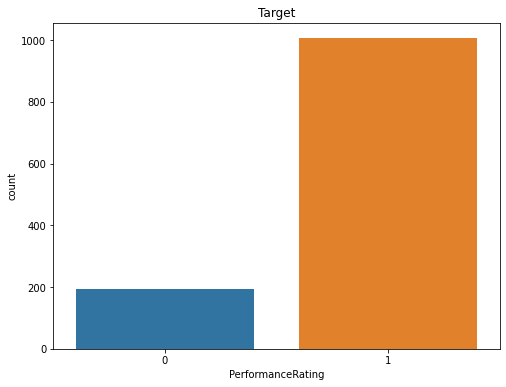

In [ ]:
#Analyze target variable to check balanced dataset

plt.figure(figsize=(8,6))
sb.countplot(df['PerformanceRating'])
plt.title('Target')
plt.show()

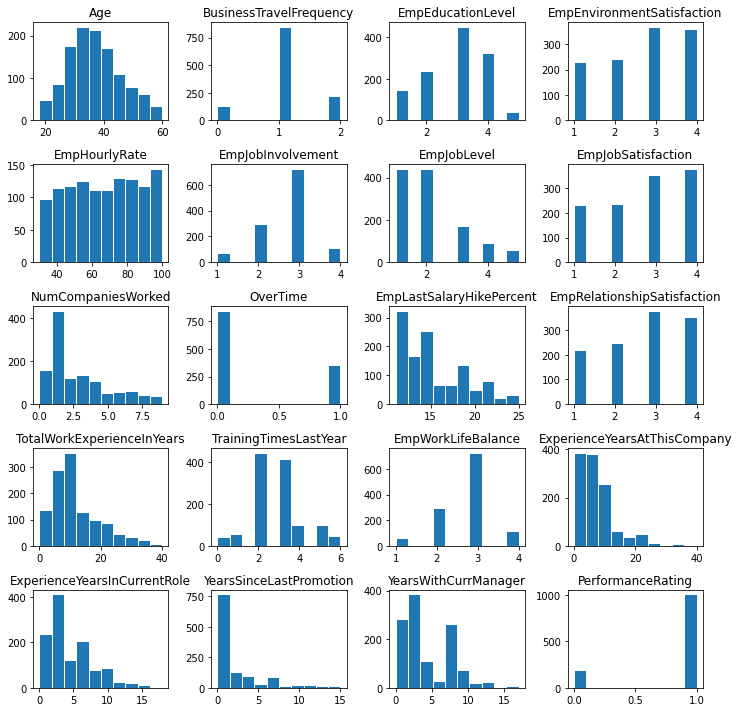

In [ ]:
df.hist(figsize=(10,10), edgecolor='white', linewidth=1, grid=False)
plt.tight_layout()
plt.show()

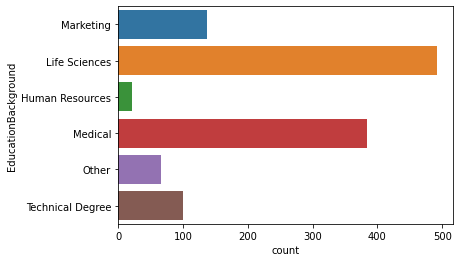

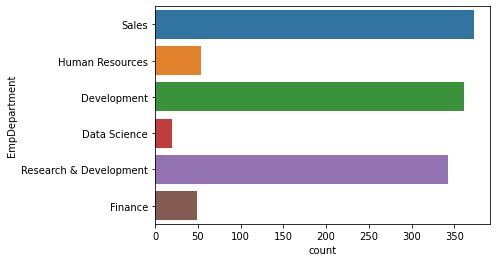

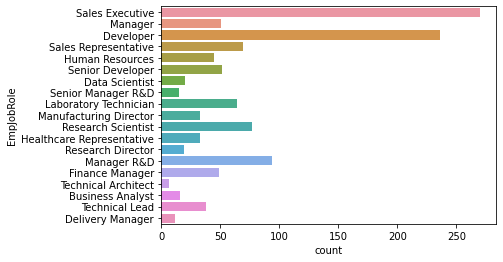

In [ ]:
for feature in df.dtypes[df.dtypes=='object'].index:
    sb.countplot(y=feature, data=df)
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   EducationBackground           1200 non-null   object
 2   EmpDepartment                 1200 non-null   object
 3   EmpJobRole                    1200 non-null   object
 4   BusinessTravelFrequency       1200 non-null   int64 
 5   EmpEducationLevel             1200 non-null   int64 
 6   EmpEnvironmentSatisfaction    1200 non-null   int64 
 7   EmpHourlyRate                 1200 non-null   int64 
 8   EmpJobInvolvement             1200 non-null   int64 
 9   EmpJobLevel                   1200 non-null   int64 
 10  EmpJobSatisfaction            1200 non-null   int64 
 11  NumCompaniesWorked            1200 non-null   int64 
 12  OverTime                      1200 non-null   int64 
 13  EmpLastSalaryHikeP

In [ ]:
df['EducationBackground'] =df['EducationBackground'].astype('category').cat.codes
df['EmpDepartment'] =df['EmpDepartment'].astype('category').cat.codes
df['EmpJobRole'] =df['EmpJobRole'].astype('category').cat.codes

In [ ]:
df.head()

,Age,EducationBackground,EmpDepartment,EmpJobRole,BusinessTravelFrequency,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,2,5,13,1,3,4,55,3,2,...,12,4,10,2,2,10,7,0,8,1
1,47,2,5,13,1,4,4,42,3,2,...,12,4,20,2,3,7,7,1,7,1
2,40,1,5,13,2,4,4,48,2,3,...,21,3,20,2,3,18,13,1,12,1
3,41,0,3,8,1,4,2,73,2,5,...,15,2,23,2,2,21,6,12,6,1
4,60,2,5,13,1,4,1,84,3,2,...,14,4,10,1,3,2,2,2,2,1


In [ ]:
df.to_csv('analytical_base_table_v1.csv', index=None)

In [ ]:
#Modelling

df = pd.read_csv('analytical_base_table_v1.csv')

In [ ]:
y = df.PerformanceRating
X = df.drop('PerformanceRating', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.PerformanceRating)
print(len(X_train), len(X_test), len(y_train), len(y_test))

960 240 960 240


In [ ]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', solver='liblinear',random_state=123)),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='liblinear', random_state=123)),
    'rf' : make_pipeline(RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(GradientBoostingClassifier(random_state=123))
}

In [ ]:
l1_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

l2_hyperparameters = {
    'logisticregression__C' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
}

In [ ]:

rf_hyperparameters = {
    'randomforestclassifier__n_estimators' : [100, 200],
    'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
    'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10],
}

In [ ]:
gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators' : [100, 200],
    'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth' : [1, 3, 5]
}

In [ ]:

hyperparameters = {
    'l1' : l1_hyperparameters,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

In Progress: l1
No handles with labels found to put in legend.


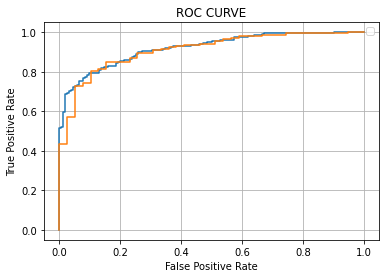

Area under train roc 0.9194630334602285
Area under test roc 0.9099374920270442
l1 completed.
In Progress: l2
No handles with labels found to put in legend.


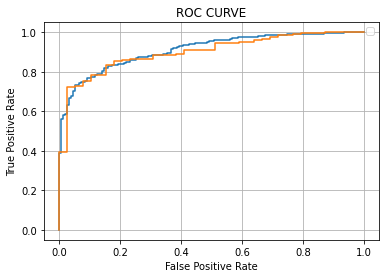

Area under train roc 0.9107593668603486
Area under test roc 0.8996045413955862
l2 completed.
In Progress: rf
No handles with labels found to put in legend.


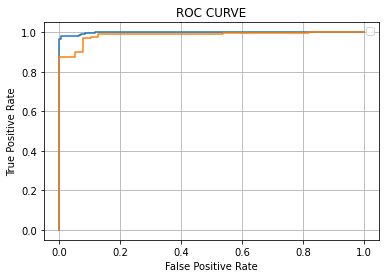

Area under train roc 0.9982528551392507
Area under test roc 0.9841816558234469
rf completed.
In Progress: gb
No handles with labels found to put in legend.


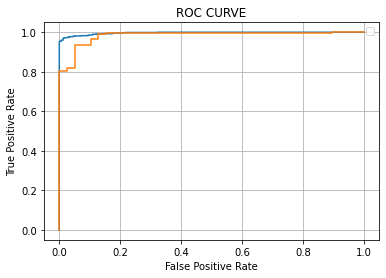

Area under train roc 0.9966780204367861
Area under test roc 0.982268146447251
gb completed.


In [ ]:
fitted_models = {}
for name, pipeline in pipelines.items():    
    print("In Progress:", name)
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=None)
    model.fit(X_train, y_train)
    fitted_models[name] = model

    train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
    test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])



    plt.grid(True)
    plt.plot(train_fpr, train_tpr) #label="train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr) #label="test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE")
    plt.show()

    #Area under ROC curve
    print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
    print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))
    
    print(name, "completed.")

In [ ]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

l1 0.86875
l2 0.871875
rf 0.9635416666666666
gb 0.9625


In [ ]:
for name, model in fitted_models.items():
    print('Results for:', name)

    pred = fitted_models[name].predict(X_test)
    cm = confusion_matrix(y_test, pred)

    print('Accuracy:', accuracy_score(y_test, pred))
    
    precision = cm[1][1]/(cm[0][1]+cm[1][1])
    print('Precision:', precision)
    
    recall = cm[1][1]/(cm[1][0]+cm[1][1])
    print('Recall:', recall)
    
    print('F1:', f1_score(y_test, pred))
    
    pred = fitted_models[name].predict_proba(X_test)
    pred = [p[1] for p in pred]
    
  

Results for: l1
Accuracy: 0.8708333333333333
Precision: 0.9086538461538461
Recall: 0.9402985074626866
F1: 0.9242053789731052
Results for: l2
Accuracy: 0.8583333333333333
Precision: 0.8812785388127854
Recall: 0.9601990049751243
F1: 0.919047619047619
Results for: rf
Accuracy: 0.9708333333333333
Precision: 0.9754901960784313
Recall: 0.9900497512437811
F1: 0.9827160493827161
Results for: gb
Accuracy: 0.9666666666666667
Precision: 0.9753694581280788
Recall: 0.9850746268656716
F1: 0.9801980198019801


In [ ]:
from prettytable import PrettyTable
    
z = PrettyTable()

z.field_names = ["Algorithm","Accuracy","Precision","Recall","F1","Train AUC","Test AUC"]
z.add_row(["L1",0.8708333333333333,0.9086538461538461,0.9402985074626866, 0.9242053789731052, 0.9194630334602285, 0.9099374920270442])
z.add_row(["L2",0.8583333333333333,0.8812785388127854,0.9601990049751243, 0.919047619047619, 0.9107593668603486,0.8996045413955862])
z.add_row(["Gradient Boost",0.9666666666666667,0.9753694581280788, 0.9850746268656716,0.9801980198019801, 0.9966780204367861,0.982268146447251 ])
z.add_row(["Random Forest", 0.9708333333333333,0.9754901960784313,0.9900497512437811, 0.9827160493827161,0.9982528551392507, 0.9841816558234469])
print(z)



+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   Algorithm    |      Accuracy      |     Precision      |       Recall       |         F1         |     Train AUC      |      Test AUC      |
+----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|       L1       | 0.8708333333333333 | 0.9086538461538461 | 0.9402985074626866 | 0.9242053789731052 | 0.9194630334602285 | 0.9099374920270442 |
|       L2       | 0.8583333333333333 | 0.8812785388127854 | 0.9601990049751243 | 0.919047619047619  | 0.9107593668603486 | 0.8996045413955862 |
| Gradient Boost | 0.9666666666666667 | 0.9753694581280788 | 0.9850746268656716 | 0.9801980198019801 | 0.9966780204367861 | 0.982268146447251  |
| Random Forest  | 0.9708333333333333 | 0.9754901960784313 | 0.9900497512437811 | 0.9827160493827161 | 0.9982528551392507 | 0.9841

In [ ]:
with open('model_v1.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

In [ ]:
model = pickle.load(open('model_v1.pkl','rb'))
print(model.predict([[24, 1, 5, 13, 1, 2, 1, 65, 3,2, 3, 9, 0, 14,1, 4, 3, 3, 2, 2, 2, 0]]))

[0]
